In [3]:
#Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
file = "Resources/car_insurance_claim.csv"
claim_data = pd.read_csv(file)
claim_data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [5]:
claim_data.count()

ID            10302
KIDSDRIV      10302
BIRTH         10302
AGE           10295
HOMEKIDS      10302
YOJ            9754
INCOME         9732
PARENT1       10302
HOME_VAL       9727
MSTATUS       10302
GENDER        10302
EDUCATION     10302
OCCUPATION     9637
TRAVTIME      10302
CAR_USE       10302
BLUEBOOK      10302
TIF           10302
CAR_TYPE      10302
RED_CAR       10302
OLDCLAIM      10302
CLM_FREQ      10302
REVOKED       10302
MVR_PTS       10302
CLM_AMT       10302
CAR_AGE        9663
CLAIM_FLAG    10302
URBANICITY    10302
dtype: int64

In [6]:
#drop rows with missing information & data 
claim_data = claim_data.dropna(how='any')
claim_data.count()

ID            7657
KIDSDRIV      7657
BIRTH         7657
AGE           7657
HOMEKIDS      7657
YOJ           7657
INCOME        7657
PARENT1       7657
HOME_VAL      7657
MSTATUS       7657
GENDER        7657
EDUCATION     7657
OCCUPATION    7657
TRAVTIME      7657
CAR_USE       7657
BLUEBOOK      7657
TIF           7657
CAR_TYPE      7657
RED_CAR       7657
OLDCLAIM      7657
CLM_FREQ      7657
REVOKED       7657
MVR_PTS       7657
CLM_AMT       7657
CAR_AGE       7657
CLAIM_FLAG    7657
URBANICITY    7657
dtype: int64

In [7]:
#claim_data[['TRAVTIME']].head()

In [8]:
# CLEANING DATA

# 1. get rid of '$' & ',' and convertcolumns values to numeric in 
    
# CLM_AMT
claim_data['CLM_AMT'] = claim_data['CLM_AMT'].str.replace('$','').str.replace(',','')
claim_data['CLM_AMT'] = pd.to_numeric(claim_data['CLM_AMT'])
# OLDCLAIM
claim_data['OLDCLAIM'] = claim_data['OLDCLAIM'].str.replace('$','').str.replace(',','')
claim_data['OLDCLAIM'] = pd.to_numeric(claim_data['OLDCLAIM'])
#INCOME
claim_data['INCOME'] = claim_data['INCOME'].str.replace('$','').str.replace(',','')
claim_data['INCOME'] = pd.to_numeric(claim_data['INCOME'])
#HOME_VAL
claim_data['HOME_VAL'] = claim_data['HOME_VAL'].str.replace('$','').str.replace(',','')
claim_data['HOME_VAL'] = pd.to_numeric(claim_data['HOME_VAL'])


# 2. convert float data to integers in AGE, CAR_AGE, and TRAVTIME 

#pd.options.display.float_format = '{:,.0f}'.format


In [9]:
claim_data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,67349,No,0,z_No,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,91449,No,257252,z_No,...,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,52881,No,0,z_No,...,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,16039,No,124191,Yes,...,z_SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
6,871024631,0,05MAY65,34.0,1,12.0,125301,Yes,0,z_No,...,Sports Car,no,0,0,No,0,2946,7.0,1,Highly Urban/ Urban


In [10]:
claim_data.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

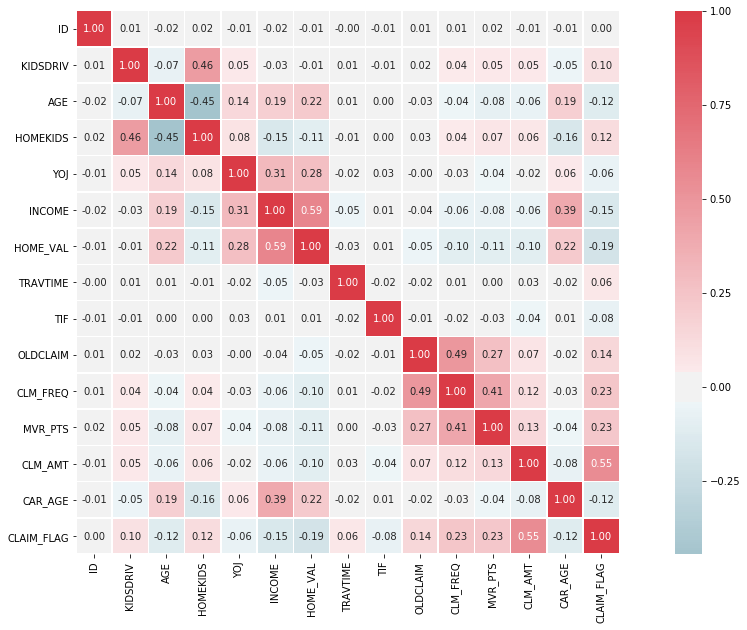

In [11]:
#Correlation between Variables
corr = claim_data.corr()

#correlation map

# Create color map ranging between two colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True )

# Save the figure as png file
plt.savefig("Images/Correlation_between_variables")

In [12]:
# drop unnecessary variables 

claim_data.drop(columns=['BIRTH','REVOKED','BLUEBOOK','TIF','MVR_PTS','CLAIM_FLAG','MSTATUS','HOMEKIDS',
                         'PARENT1','YOJ'], inplace=True)
claim_data.head()

,ID,KIDSDRIV,AGE,INCOME,HOME_VAL,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE,URBANICITY
0,63581743,0,60.0,67349,0,M,PhD,Professional,14,Private,Minivan,yes,4461,2,0,18.0,Highly Urban/ Urban
1,132761049,0,43.0,91449,257252,M,z_High School,z_Blue Collar,22,Commercial,Minivan,yes,0,0,0,1.0,Highly Urban/ Urban
2,921317019,0,48.0,52881,0,M,Bachelors,Manager,26,Private,Van,yes,0,0,0,10.0,Highly Urban/ Urban
3,727598473,0,35.0,16039,124191,z_F,z_High School,Clerical,5,Private,z_SUV,no,38690,2,0,10.0,Highly Urban/ Urban
6,871024631,0,34.0,125301,0,z_F,Bachelors,z_Blue Collar,46,Commercial,Sports Car,no,0,0,2946,7.0,Highly Urban/ Urban


In [13]:
# group data by KIDSDRIV colomn 
claim_kids_drive = claim_data.groupby(['KIDSDRIV'],as_index=False)

# Calculate claim averages using the .mean() method
claim_kids = claim_kids_drive.mean()
claim_kids




,KIDSDRIV,ID,AGE,INCOME,HOME_VAL,TRAVTIME,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE
0,0,4.971854e+08,44.966701,58456.564739,150552.610376,33.647391,3932.429315,0.772112,1391.154452,7.991675
1,1,5.068788e+08,42.621087,53349.154860,145064.285008,33.563427,4969.718287,0.906096,2153.985173,7.354201
2,2,4.945324e+08,42.957692,54708.846154,149940.592308,34.169231,4062.634615,0.923077,1956.469231,6.776923
3,3,5.178512e+08,42.819672,51607.180328,142388.901639,34.229508,4837.344262,1.098361,2640.245902,7.262295
4,4,4.806187e+08,64.500000,63900.000000,230188.500000,55.000000,12196.000000,0.500000,0.000000,3.500000


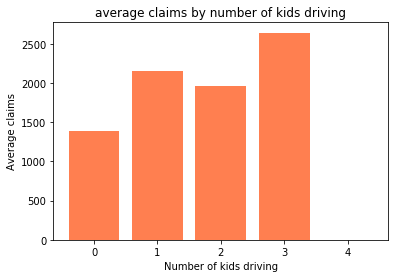

In [14]:
# average claims by number of kids driving 

x = claim_kids['KIDSDRIV']
y = claim_kids['CLM_AMT']

plt.bar(x, y, color= 'coral', alpha=1, align="center")

plt.title('average claims by number of kids driving')
plt.xlabel('Number of kids driving')
plt.ylabel('Average claims')

# Save the figure as png file
plt.savefig("Images/AVG_CLAIM_BY_KIDSDRIVE.png")


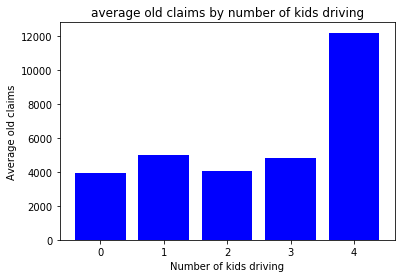

In [15]:
# average old claims by number of kids driving

y1 = claim_kids['OLDCLAIM']
plt.bar(x, y1, color= 'blue', alpha=1, align="center")
plt.title('average old claims by number of kids driving')
plt.xlabel('Number of kids driving')
plt.ylabel('Average old claims')

# Save the figure as png file
plt.savefig("Images/AVG_OLDCLAIM_BY_KIDSDRIVE.png")


In [16]:
# group data by CAR_USE colomn calculate their avrages 
claim_car = claim_data.groupby(['CAR_USE'],as_index=False)

claim_car_use= claim_car.sum()
claim_car_use


,CAR_USE,ID,KIDSDRIV,AGE,INCOME,HOME_VAL,TRAVTIME,OLDCLAIM,CLM_FREQ,CLM_AMT,CAR_AGE
0,Commercial,1313143222959,450,112306.0,147191078,378704298,86749,11192486,2303,5401366,17017.0
1,Private,2500226837990,868,229966.0,295929308,770247787,171052,19653340,3749,5934136,43419.0


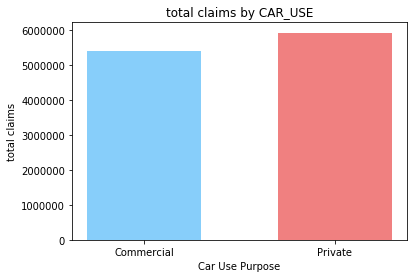

In [18]:
# total claims by CAR_USE 

x = claim_car_use['CAR_USE']
y = claim_car_use['CLM_AMT']
Y1= claim_car_use['OLDCLAIM']

colors=('lightskyblue','lightcoral')

plt.bar(x, y, color=colors, alpha=1, align="center", width=0.6,data=None)

plt.title('total claims by CAR_USE')
plt.xlabel('Car Use Purpose')
plt.ylabel('total claims')

# Save the figure as png file
plt.savefig("Images/total_claims_by_CAR_USE.png")

In [165]:
claim_sum = claim_data.groupby('URBANICITY').CLM_AMT.sum()
claim_sum

URBANICITY
Highly Urban/ Urban      10712651
z_Highly Rural/ Rural      622851
Name: CLM_AMT, dtype: int64

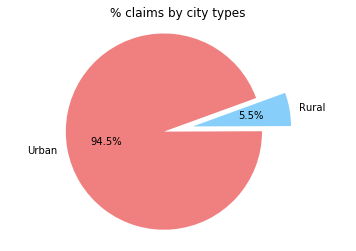

In [166]:

#pie chart 
colors=("lightcoral","lightskyblue")
labels= ('Urban','Rural')
explode = (0,0.3)
plt.pie(claim_sum,colors=colors,explode= explode,labels=labels,autopct="%1.1f%%",shadow=False, startangle=20)
plt.axis("equal")
plt.title('% claims by city types')
# Save the figure as png file
plt.savefig("Images/percentage_claims_by_city.png")
plt.show()

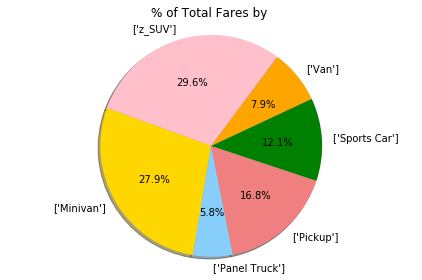

In [167]:
# Graph of each car type portion in the data
city = claim_data.groupby("CAR_TYPE")["CAR_TYPE"].unique()


fare_list = claim_data.groupby("CAR_TYPE")["ID"].count()
colors = ["gold", "lightskyblue", "lightcoral", "green", "orange", "pink"]
explode = (0, 0, 0, 0, 0, 0)
plt.pie(fare_list, labels=city, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)

plt.title("% of Total Fares by ")
plt.axis("equal")
plt.tight_layout()
plt.savefig("Images/%Total Fares by car type.png")         
plt.show()

In [169]:
# Create the bins in which Data will be held
# Bins are separated by age
bins = [0, 18, 29, 39, 49, 59, 69, 79, 100]

# Create the names for the four bins
group_names = ["<18", "18-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-100" ]
claim_data['Age Group'] = pd.cut(claim_data['AGE'], bins, labels=group_names)

age_grouped = claim_data.groupby('Age Group')
total_count_age = pd.DataFrame(age_grouped["ID"].nunique()).rename(columns={'ID':'Total Count'}).reset_ind



AttributeError: 'DataFrame' object has no attribute 'reset_ind'

In [ ]:
age = total_count_age["Total Count"]
labels = total_count_age["Age Group"]

#pie chart 
colors=["purple","gold","blue","green","red","salmon","silver","orange"]
explode = (0.3,0,0,0,0,0,0,0.5)
plt.pie(age,colors=colors,explode=explode,labels=labels,autopct="%1.1f%%",shadow=True, startangle=90)
plt.axis("equal")
plt.title('% claims by age group')
plt.show()

In [ ]:
x_axis = np.arange(0, len(labels))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("% claims by age group")
plt.xlabel("Age Group")
plt.ylabel("Number of Claims Filed")

plt.xlim(-0.75, len(labels)-.25)
plt.ylim(0, max(age) + 500)

plt.bar(x_axis, age, facecolor="lightgreen", alpha=0.75, align="center")
plt.xticks(tick_locations, labels)
plt.show()

In [ ]:
# claims by Ages 
#X = claim_data.groupby[AGE]
#Y = claim_data.CLM_AMT
#plt.bar(X,Y)
#plt.title('total claims by CAR_USE')
#plt.xlabel('Car Use Purpose')
#plt.ylabel('total claims')

# Save the figure as png file
#plt.savefig("Images/total_claims_by_CAR_USE.png")
#plt.show()